In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.svm import SVR, LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

## **Data Collection**

In [135]:
df = pd.read_csv('/kaggle/input/housing-price-prediction/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## **Data Representation**

In [136]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [137]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [138]:
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
218,4830000,4815,2,1,1,yes,no,no,no,yes,0,yes,semi-furnished
130,5866000,4800,3,1,1,yes,yes,yes,no,no,0,no,unfurnished
172,5250000,8400,3,1,2,yes,yes,yes,no,yes,2,yes,unfurnished
154,5530000,3650,3,2,2,yes,no,no,no,no,2,no,semi-furnished
133,5810000,4800,3,1,3,yes,no,no,no,yes,0,no,unfurnished
335,3920000,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
516,2450000,3240,2,1,1,no,yes,no,no,no,1,no,unfurnished
120,5950000,6540,3,1,1,yes,yes,yes,no,no,2,yes,furnished
331,3920000,7260,3,2,1,yes,yes,yes,no,no,3,no,furnished
424,3360000,3100,3,1,2,no,no,yes,no,no,0,no,semi-furnished


## **Data Wrangling**

In [139]:
df.duplicated().sum()

0

In [140]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## ****Dara Analysis****

# Univariate

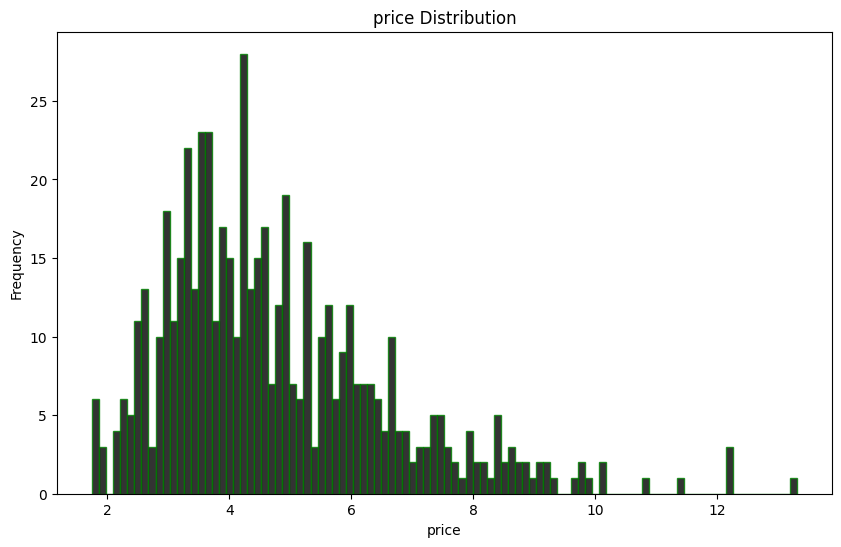

In [141]:
plt.figure(figsize=(10, 6))
plt.hist(df['price']/1000000, bins=100, color='black', alpha=0.8, edgecolor='green')
plt.title('price Distribution')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()


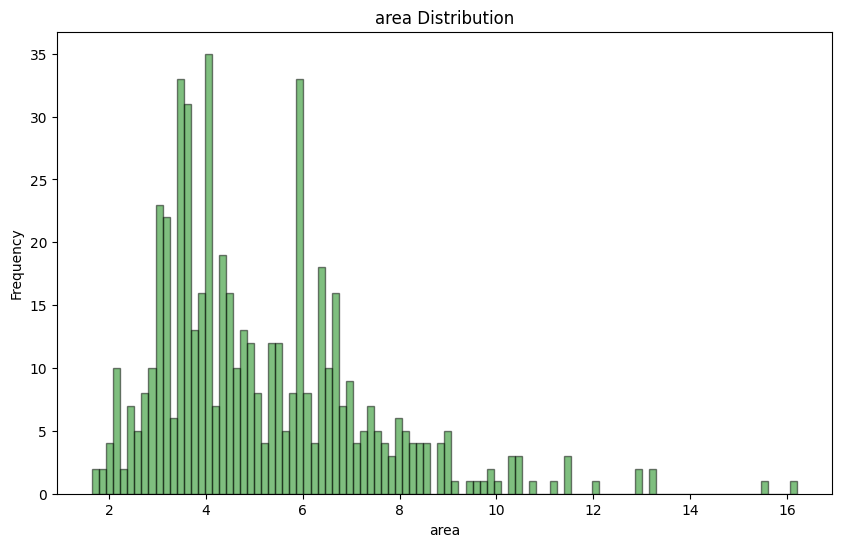

In [142]:
plt.figure(figsize=(10, 6))
plt.hist(df['area']/1000, bins=100, color='green', alpha=0.5, edgecolor='black')
plt.title('area Distribution')
plt.xlabel('area')
plt.ylabel('Frequency')
plt.show()

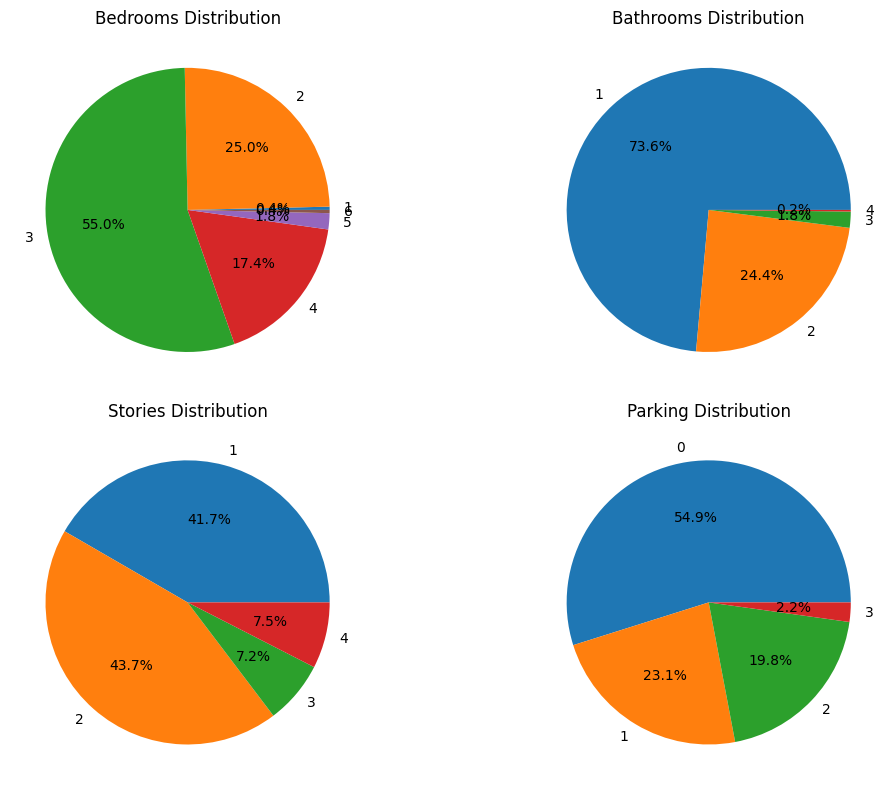

In [143]:
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(12, 8))

# توزيع عدد غرف النوم
ax1 = fig.add_subplot(2, 2, 1)
bedroom_counts = df['bedrooms'].value_counts().sort_index()
ax1.pie(bedroom_counts, labels=bedroom_counts.index.astype(str), autopct='%1.1f%%')
ax1.set_title('Bedrooms Distribution')

# توزيع عدد الحمامات
ax2 = fig.add_subplot(2, 2, 2)
bathroom_counts = df['bathrooms'].value_counts().sort_index()
ax2.pie(bathroom_counts, labels=bathroom_counts.index.astype(str), autopct='%1.1f%%')
ax2.set_title('Bathrooms Distribution')

# توزيع عدد الطوابق
ax3 = fig.add_subplot(2, 2, 3)
stories_counts = df['stories'].value_counts().sort_index()
ax3.pie(stories_counts, labels=stories_counts.index.astype(str), autopct='%1.1f%%')
ax3.set_title('Stories Distribution')

# توزيع عدد مواقف السيارات
ax4 = fig.add_subplot(2, 2, 4)
parking_counts = df['parking'].value_counts().sort_index()
ax4.pie(parking_counts, labels=parking_counts.index.astype(str), autopct='%1.1f%%')
ax4.set_title('Parking Distribution')

plt.tight_layout()
plt.show()


In [144]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


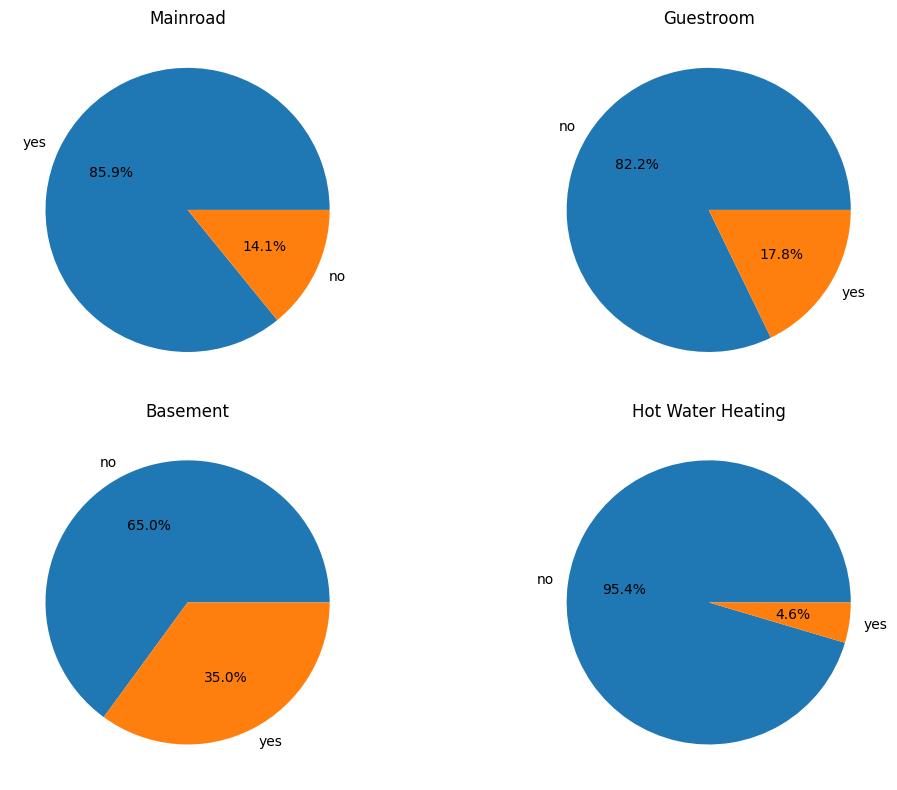

In [145]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

# mainroad
ax1 = fig.add_subplot(2, 2, 1)
data1 = df['mainroad'].value_counts()
ax1.pie(data1, labels=data1.index, autopct='%1.1f%%')
ax1.set_title('Mainroad')

# guestroom
ax2 = fig.add_subplot(2, 2, 2)
data2 = df['guestroom'].value_counts()
ax2.pie(data2, labels=data2.index, autopct='%1.1f%%')
ax2.set_title('Guestroom')

# basement
ax3 = fig.add_subplot(2, 2, 3)
data3 = df['basement'].value_counts()
ax3.pie(data3, labels=data3.index, autopct='%1.1f%%')
ax3.set_title('Basement')

# hotwaterheating
ax4 = fig.add_subplot(2, 2, 4)
data4 = df['hotwaterheating'].value_counts()
ax4.pie(data4, labels=data4.index, autopct='%1.1f%%')
ax4.set_title('Hot Water Heating')

plt.tight_layout()
plt.show()


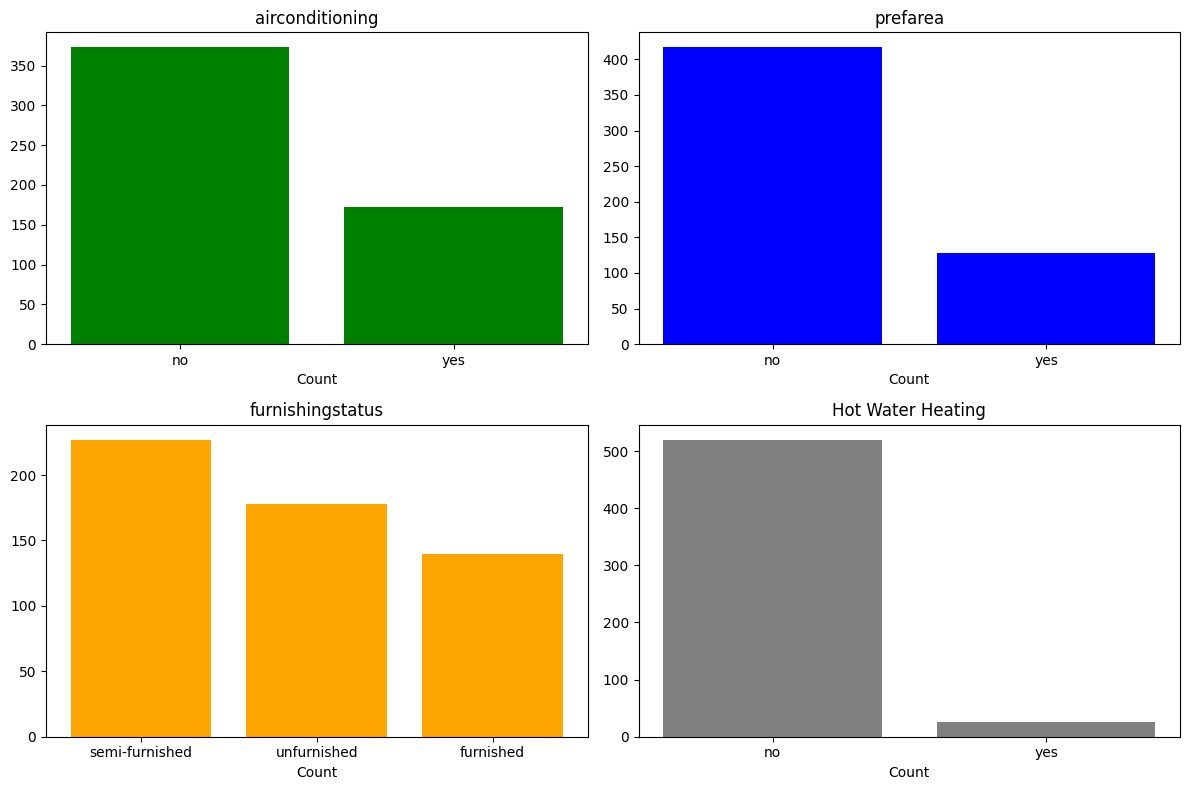

In [146]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

# Mainroad
ax1 = fig.add_subplot(2, 2, 1)
data1 = df['airconditioning'].value_counts()
ax1.bar(data1.index, data1.values, color='green')
ax1.set_title('airconditioning')
ax1.set_xlabel('Count')

# Guestroom
ax2 = fig.add_subplot(2, 2, 2)
data2 = df['prefarea'].value_counts()
ax2.bar(data2.index, data2.values, color='blue')
ax2.set_title('prefarea')
ax2.set_xlabel('Count')

# Basement
ax3 = fig.add_subplot(2, 2, 3)
data3 = df['furnishingstatus'].value_counts()
ax3.bar(data3.index, data3.values, color='orange')
ax3.set_title('furnishingstatus')
ax3.set_xlabel('Count')

# Hot Water Heating
ax4 = fig.add_subplot(2, 2, 4)
data4 = df['hotwaterheating'].value_counts()
ax4.bar(data4.index, data4.values, color='gray')
ax4.set_title('Hot Water Heating')
ax4.set_xlabel('Count')

plt.tight_layout()
plt.show()

# Bivalarite

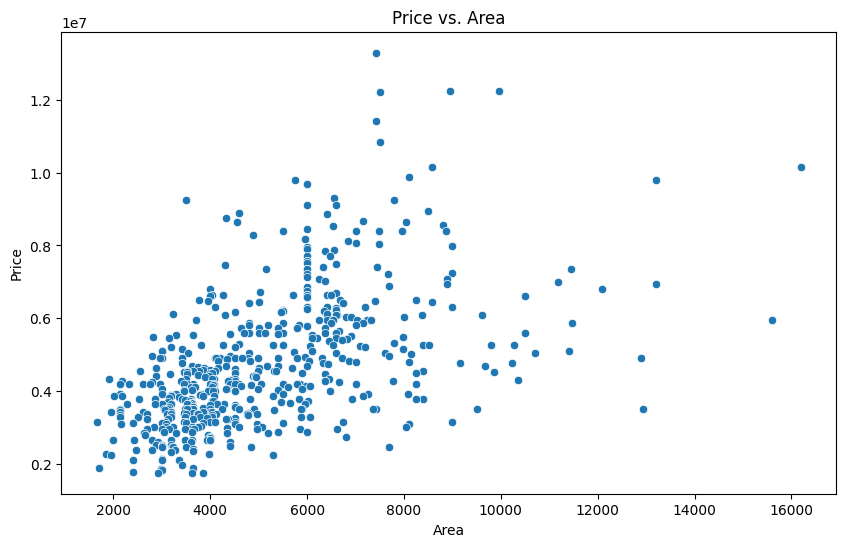

In [147]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='price')  
plt.title('Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')

plt.show()

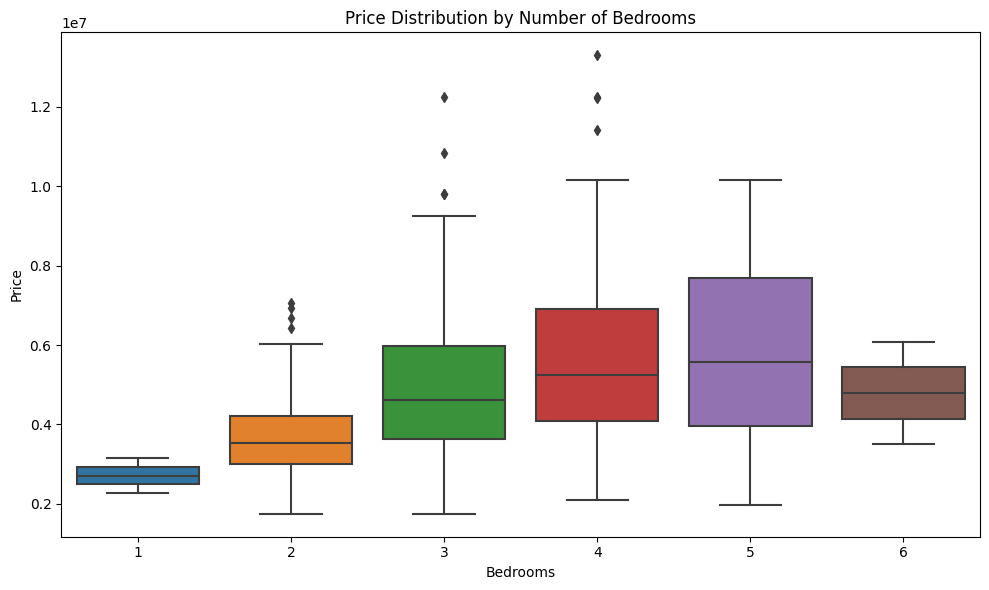

In [148]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='bedrooms', y='price', data=df)

plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


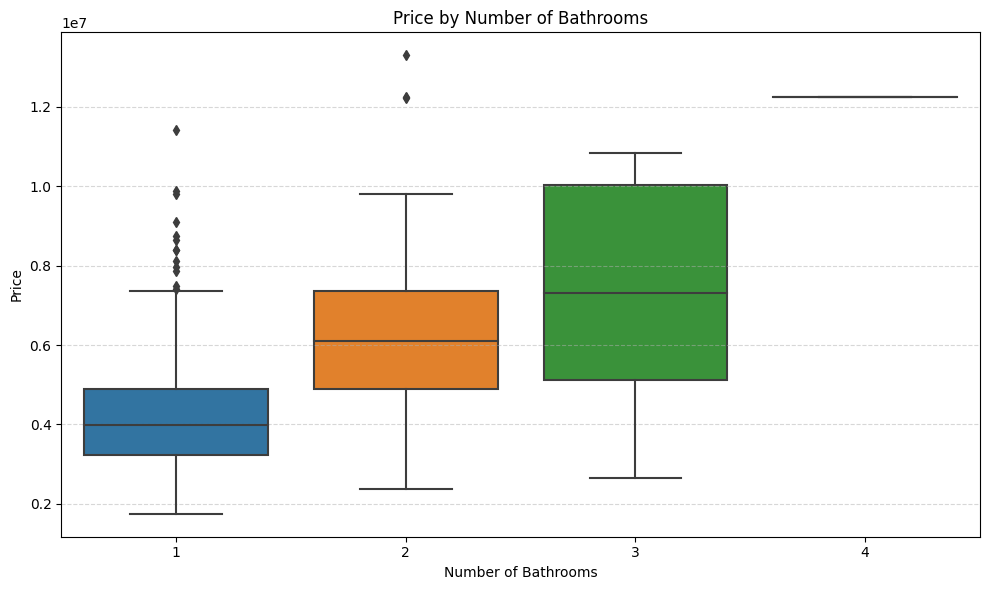

In [149]:


plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='bathrooms', y='price')

plt.title('Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

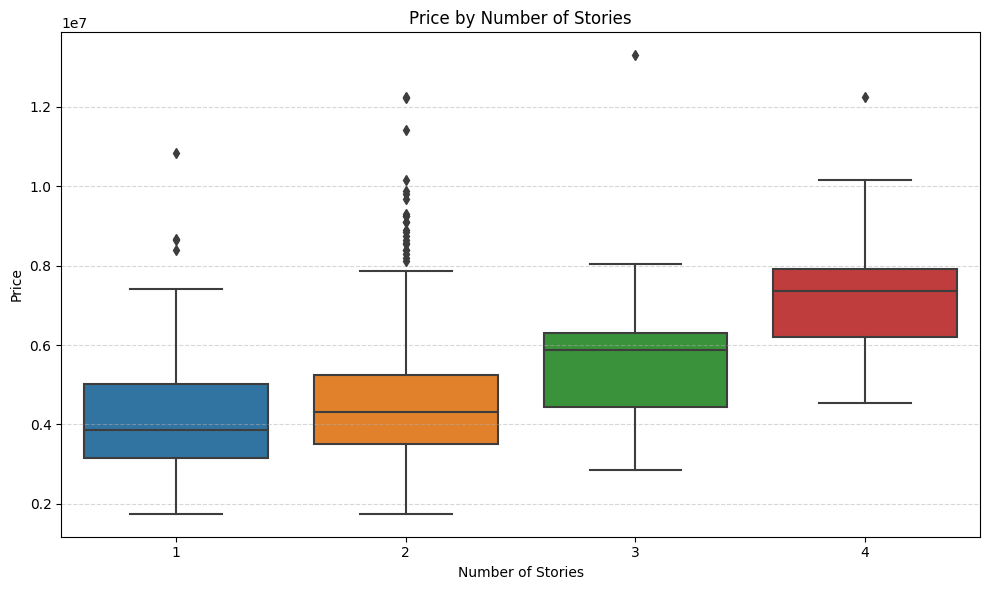

In [150]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='stories', y='price')
plt.title('Price by Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


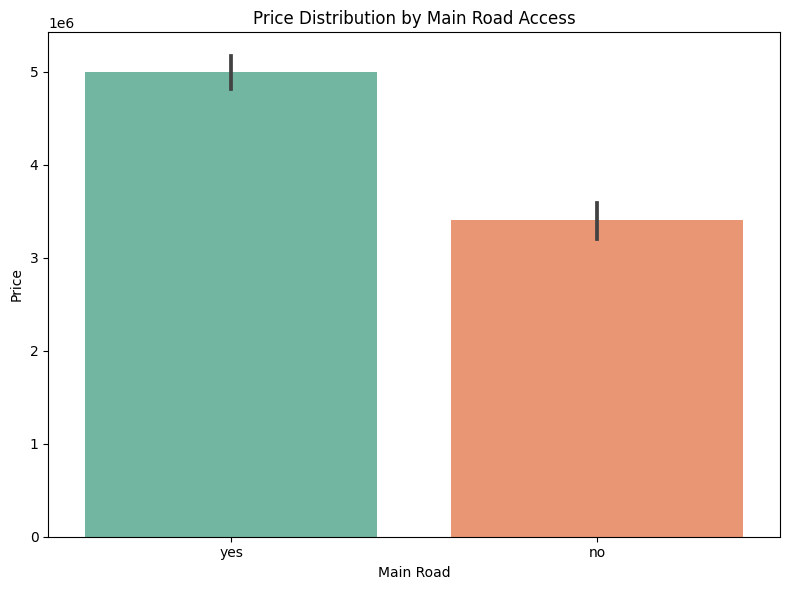

In [151]:

plt.figure(figsize=(8, 6))
sns.barplot(x='mainroad', y='price', data=df, palette='Set2')

plt.title('Price Distribution by Main Road Access')
plt.xlabel('Main Road')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


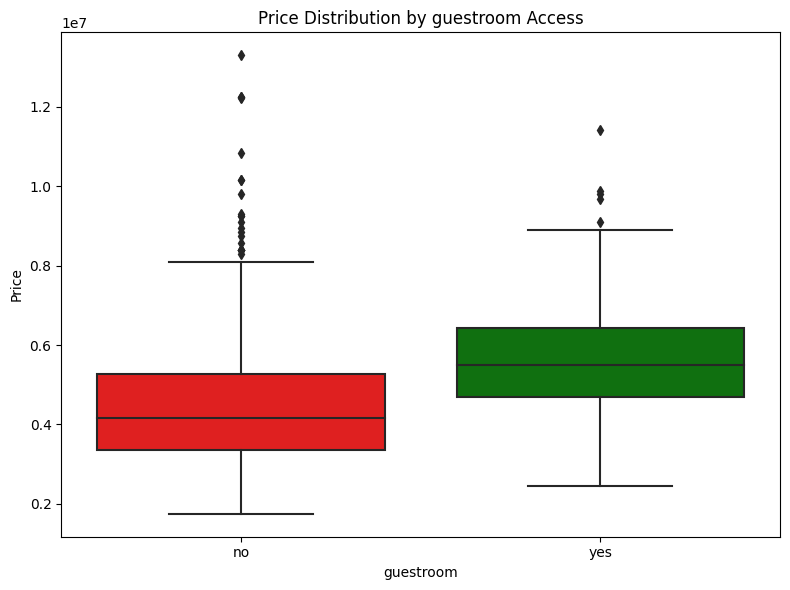

In [152]:


plt.figure(figsize=(8, 6))
sns.boxplot(x='guestroom', y='price', data=df, palette={'yes': 'green', 'no': 'red'})


plt.title('Price Distribution by guestroom Access')
plt.xlabel('guestroom')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

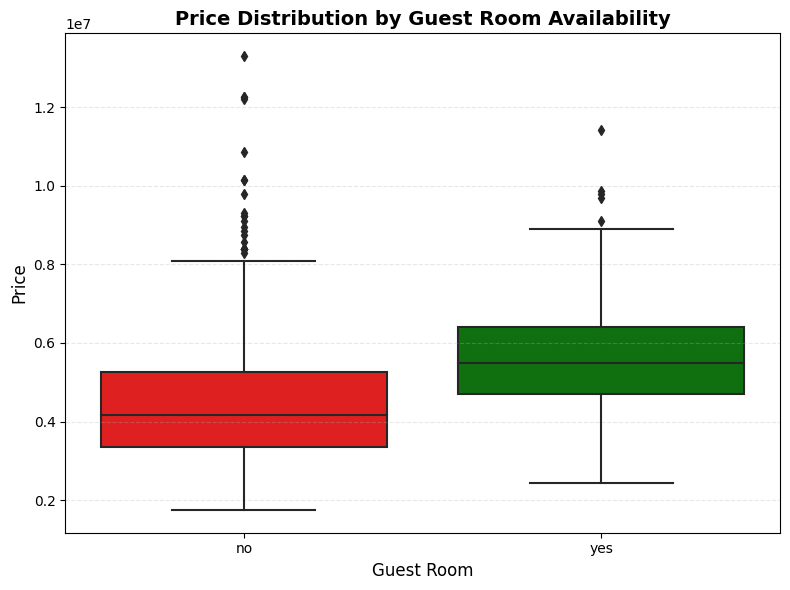

In [153]:
palette = {'yes': 'green', 'no': 'red'}

plt.figure(figsize=(8, 6))
sns.boxplot(x='guestroom', y='price', data=df, palette=palette)

plt.title('Price Distribution by Guest Room Availability', fontsize=14, fontweight='bold')
plt.xlabel('Guest Room', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



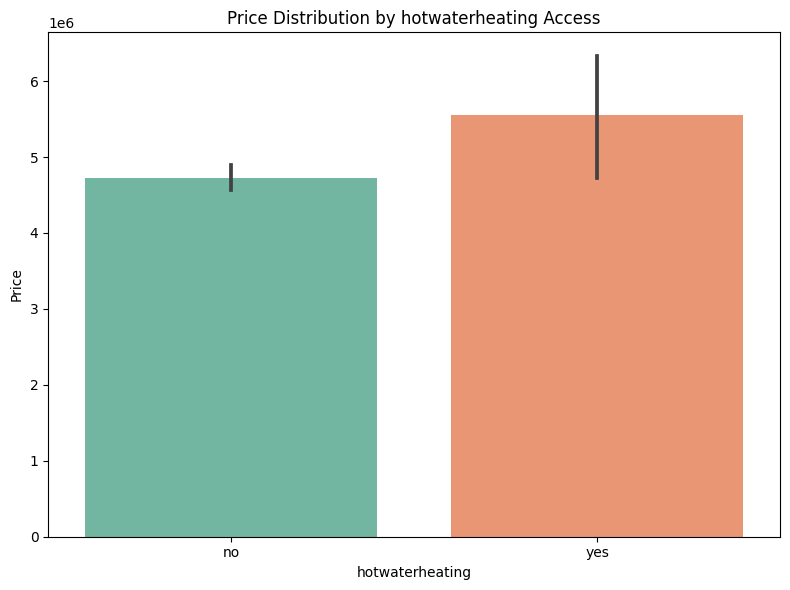

In [154]:

plt.figure(figsize=(8, 6))
sns.barplot(x='hotwaterheating', y='price', data=df, palette='Set2')

plt.title('Price Distribution by hotwaterheating Access')
plt.xlabel('hotwaterheating')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

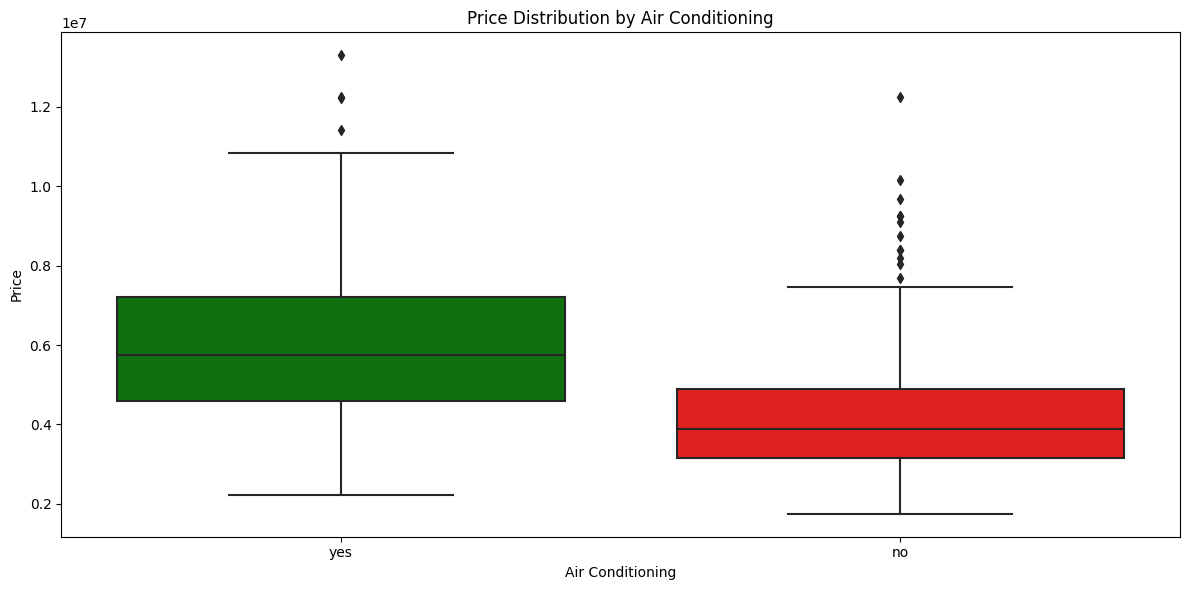

In [155]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='airconditioning', y='price', data=df, palette={'yes': 'green', 'no': 'red'})
plt.title('Price Distribution by Air Conditioning')
plt.xlabel('Air Conditioning')
plt.ylabel('Price')
plt.tight_layout()
plt.show()



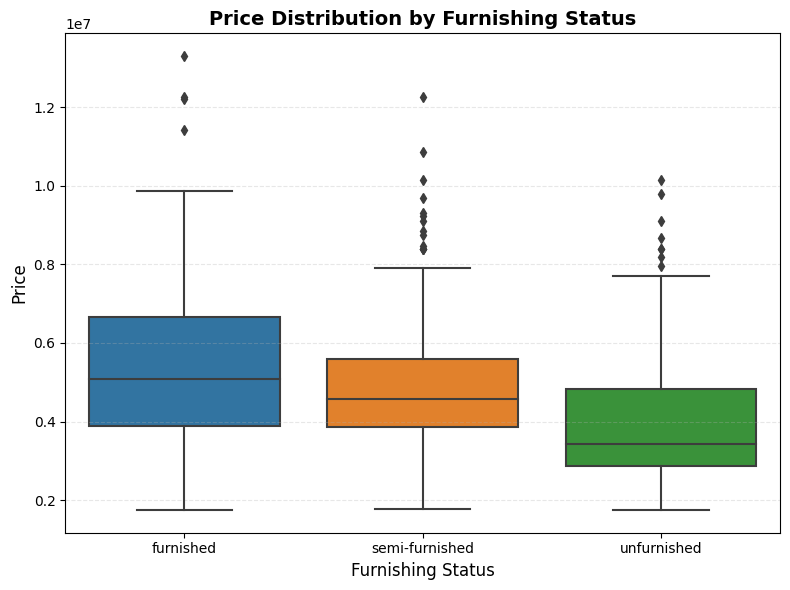

In [156]:


custom_palette = {
    'furnished': '#00C49A',
    'semi-furnished': '#FFA600',
    'unfurnished': '#FF6E54'
}

plt.figure(figsize=(8, 6))
sns.boxplot(x='furnishingstatus', y='price', data=df)

plt.title('Price Distribution by Furnishing Status', fontsize=14, fontweight='bold')
plt.xlabel('Furnishing Status', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [157]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# multivariate

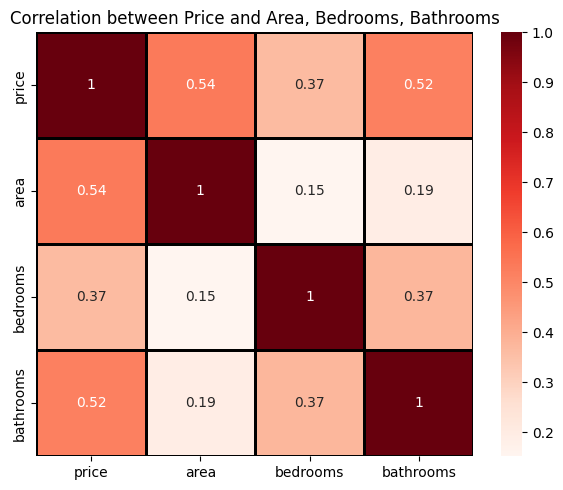

In [158]:

data_plotting = df[['price', 'area', 'bedrooms', 'bathrooms']].corr(method='pearson')

plt.figure(figsize=(6, 5))
sns.heatmap(data_plotting, cmap='Reds', linecolor='black', linewidths=1, annot=True)

plt.title('Correlation between Price and Area, Bedrooms, Bathrooms')
plt.tight_layout()
plt.show()

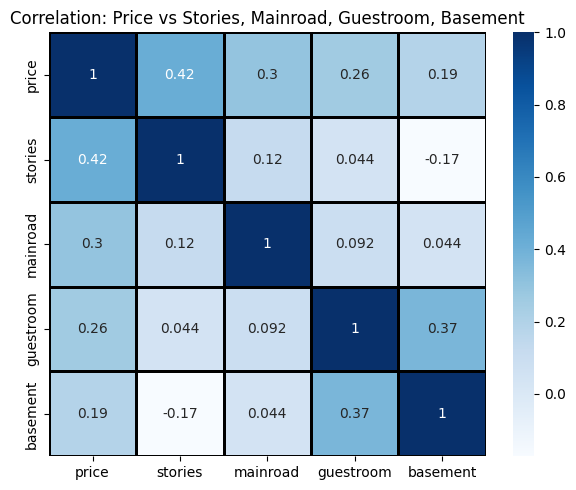

In [159]:

df_encoded = df.copy()
df_encoded['mainroad'] = df_encoded['mainroad'].map({'yes': 1, 'no': 0})
df_encoded['guestroom'] = df_encoded['guestroom'].map({'yes': 1, 'no': 0})
df_encoded['basement'] = df_encoded['basement'].map({'yes': 1, 'no': 0})

data_plotting = df_encoded[['price', 'stories', 'mainroad', 'guestroom', 'basement']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(data_plotting, cmap='Blues', linecolor='black', linewidths=1, annot=True)

plt.title('Correlation: Price vs Stories, Mainroad, Guestroom, Basement')
plt.tight_layout()
plt.show()


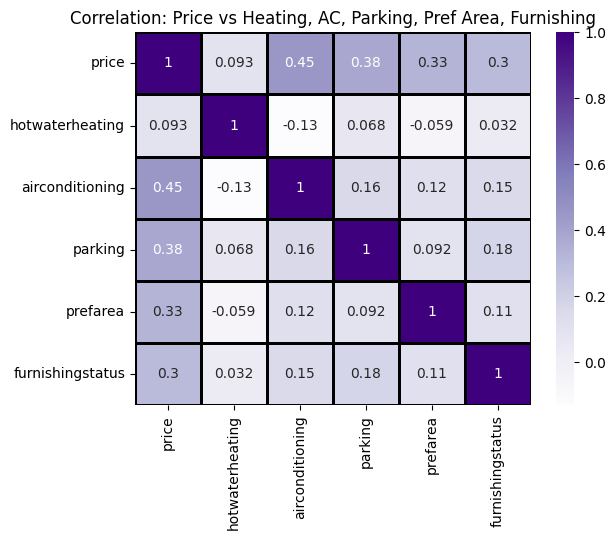

In [160]:

df_encoded = df.copy()
df_encoded['hotwaterheating'] = df_encoded['hotwaterheating'].map({'yes': 1, 'no': 0})
df_encoded['airconditioning'] = df_encoded['airconditioning'].map({'yes': 1, 'no': 0})
df_encoded['prefarea'] = df_encoded['prefarea'].map({'yes': 1, 'no': 0})

df_encoded['furnishingstatus'] = df_encoded['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})

cols = ['price', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
correlation = df_encoded[cols].corr()

plt.figure(figsize=(6.5, 5.5))
sns.heatmap(correlation, annot=True, cmap='Purples', linecolor='black', linewidths=1)
plt.title('Correlation: Price vs Heating, AC, Parking, Pref Area, Furnishing')
plt.tight_layout()
plt.show()


## **Data Preprocessing**

In [161]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})


In [162]:
X = df.drop(columns=['price'])
y = df['price']

In [163]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [164]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [165]:
scaler = MinMaxScaler()
X['area'] = scaler.fit_transform(X[['area']])

In [166]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,train_size=0.8, shuffle=True, random_state=True)

In [167]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
272,0.166667,3,1,1,1,1,1,0,0,2,0,1
40,0.336770,3,1,2,1,0,1,0,1,0,1,2
326,0.168385,4,1,1,0,0,1,0,0,0,0,0
441,0.186942,3,1,2,1,0,0,0,0,0,0,0
511,0.105155,3,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.674227,3,1,3,1,0,0,0,0,2,1,1
144,0.209622,4,1,2,1,1,1,0,1,1,0,2
72,0.231615,3,1,4,1,0,0,0,1,0,1,0
235,0.276976,3,1,2,1,1,0,0,1,1,0,1


# Data Modeling

# Linear model

In [168]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [169]:
y_pr = lr.predict(X_test)

In [170]:
print(mean_squared_error(y_test, y_pr))


1602773742288.0046


In [171]:
print(mean_absolute_error(y_test,y_pr))

898629.295037104


# SGDRegressor

In [172]:
sgd = SGDRegressor()

sgd.fit(X_train, y_train)

SGDRegressor()

In [173]:
y_pred = sgd.predict(X_test)

In [174]:
print(mean_absolute_error(y_test, y_pred))

951273.1229041894


In [175]:
print(mean_squared_error(y_test, y_pred))

1752377789125.5986


# Lasso Regression

In [176]:
lasso = Lasso()

lasso.fit(X_train, y_train)

Lasso()

In [177]:
y_pred = lasso.predict(X_test)

In [178]:
print(mean_absolute_error(y_test, y_pred))

898628.2415530992


# Ridge Regression

In [179]:
ridge = Ridge()

ridge.fit(X_train, y_train)

Ridge()

In [180]:
y_pred = ridge.predict(X_test)

In [181]:
print(mean_absolute_error(y_test, y_pred))

899975.8401288171


In [182]:
import pandas as pd

mae_lasso = 898628.2415530992
mae_ridge = 899975.8401288171
mae_linear = 898629.295037104
mse_sgd = 1747183887621.6152

comparison = pd.DataFrame({
    'Model': ['SGDRegressor', 'Lasso Regression', 'Ridge Regression', 'Linear Regression'],
    'MAE': [mse_sgd, mae_lasso, mae_ridge, mae_linear],
  
})

pd.DataFrame(comparison)


,Model,MAE
0,SGDRegressor,1.747184e+12
1,Lasso Regression,8.986282e+05
2,Ridge Regression,8.999758e+05
3,Linear Regression,8.986293e+05


# SVM [SVR - LinearSVR]


In [183]:
svm_models = {
    "SVR‑RBF": make_pipeline(StandardScaler(), SVR(kernel="rbf", C=10, epsilon=0.1)),
    "LinearSVR": make_pipeline(StandardScaler(), LinearSVR(C=1.0, random_state=42, max_iter=20000))
}

svm_results = []

for name, model in svm_models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    svm_results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

pd.DataFrame(svm_results).sort_values("RMSE")

,Model,MAE,RMSE,R2
0,SVR‑RBF,1.496433e+06,2.091369e+06,-0.041587
1,LinearSVR,4.758151e+06,5.180656e+06,-5.391509


# Distance-based Models [KNeighbours Regreesor]


In [184]:
knn_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5, weights="distance"))

knn_model.fit(X_train, y_train)
preds = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

pd.DataFrame([{
    "Model": "KNN-5-distance",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2
}])

,Model,MAE,RMSE,R2
0,KNN-5-distance,864393.754439,1.244818e+06,0.630984


# Tree-based Models [DecissionTreeRegressor]


In [185]:
tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, y_train)
preds = tree_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

pd.DataFrame([{
    "Model": "DecisionTree",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2
}])

,Model,MAE,RMSE,R2
0,DecisionTree,972711.009174,1.293896e+06,0.601312


#  Ensemble Models(Bagging [BaggingRegressor - RandomForestRegressor - ExtraTreesRegressor])


In [186]:
ensemble_models = {
    "Bagging": BaggingRegressor(random_state=42, n_estimators=50),
    "RandomForest": RandomForestRegressor(random_state=42, n_estimators=100),
    "ExtraTrees": ExtraTreesRegressor(random_state=42, n_estimators=100)
}

ensemble_results = []

for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    ensemble_results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

pd.DataFrame(ensemble_results).sort_values("RMSE")

,Model,MAE,RMSE,R2
2,ExtraTrees,882567.295413,1.218371e+06,0.646497
0,Bagging,901759.668502,1.234159e+06,0.637276
1,RandomForest,913230.022936,1.260026e+06,0.621912


#  Ensemble Models(Boosting [XGBoostRegressor - CatBoostRegressor - LGBMRegressor])


In [187]:
boosting_models = {
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "CatBoost": CatBoostRegressor(n_estimators=100, random_state=42, verbose=0),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42)
}

boosting_results = []

for name, model in boosting_models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    boosting_results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

pd.DataFrame(boosting_results).sort_values("RMSE")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 12
[LightGBM] [Info] Start training from score 4768764.770642
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

,Model,MAE,RMSE,R2
1,CatBoost,901040.733144,1.289240e+06,0.604176
2,LightGBM,921271.393993,1.316014e+06,0.587565
0,XGBoost,984164.907110,1.351195e+06,0.565219


# Ensemble Models(Voting  [VotingRegressor])


In [188]:
voting_model = VotingRegressor(estimators=[
    ("lr", LinearRegression()),
    ("tree", DecisionTreeRegressor(random_state=42)),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])

voting_model.fit(X_train, y_train)
preds = voting_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

pd.DataFrame([{
    "Model": "VotingRegressor",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2
}])

,Model,MAE,RMSE,R2
0,VotingRegressor,811645.201345,1.127155e+06,0.697447


#  Ensemble Models(Stacking [StckingRegressor])


In [189]:
base_models = [
    ("tree", DecisionTreeRegressor(random_state=42)),
    ("knn", KNeighborsRegressor(n_neighbors=5))
]

meta_model = LinearRegression()

stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=False
)

stacking_model.fit(X_train, y_train)
preds = stacking_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

pd.DataFrame([{
    "Model": "StackingRegressor",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2
}])

,Model,MAE,RMSE,R2
0,StackingRegressor,842820.668978,1.153479e+06,0.68315


In [190]:

final_results = pd.concat([
    pd.DataFrame(comparison),
    pd.DataFrame(svm_results),
    pd.DataFrame([{
        "Model": "KNN-5-distance",
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }]),
    pd.DataFrame([{
        "Model": "DecisionTree",
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }]),
    pd.DataFrame(ensemble_results).sort_values("RMSE"),
    pd.DataFrame(boosting_results).sort_values("RMSE"),
    pd.DataFrame([{
        "Model": "VotingRegressor",
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }]),
    pd.DataFrame([{
        "Model": "StackingRegressor",
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }])
], ignore_index=True)
print(final_results)


                Model           MAE          RMSE        R2
0        SGDRegressor  1.747184e+12           NaN       NaN
1    Lasso Regression  8.986282e+05           NaN       NaN
2    Ridge Regression  8.999758e+05           NaN       NaN
3   Linear Regression  8.986293e+05           NaN       NaN
4             SVR‑RBF  1.496433e+06  2.091369e+06 -0.041587
5           LinearSVR  4.758151e+06  5.180656e+06 -5.391509
6      KNN-5-distance  8.428207e+05  1.153479e+06  0.683150
7        DecisionTree  8.428207e+05  1.153479e+06  0.683150
8          ExtraTrees  8.825673e+05  1.218371e+06  0.646497
9             Bagging  9.017597e+05  1.234159e+06  0.637276
10       RandomForest  9.132300e+05  1.260026e+06  0.621912
11           CatBoost  9.010407e+05  1.289240e+06  0.604176
12           LightGBM  9.212714e+05  1.316014e+06  0.587565
13            XGBoost  9.841649e+05  1.351195e+06  0.565219
14    VotingRegressor  8.428207e+05  1.153479e+06  0.683150
15  StackingRegressor  8.428207e+05  1.1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
